In [1]:
import pandas as pd
import scipy as sc
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.io import loadmat
%matplotlib inline
sns.set()

In [2]:
data = loadmat('ex4data1.mat')
weights = loadmat('ex4weights.mat')
x = data['X'].flatten()
y = (np.zeros(50000)).reshape(5000, 10)
m = y.shape[0]
initialTheta = np.concatenate((weights['Theta1'].flatten(), weights['Theta2'].flatten()), axis = 0)
theta1 = initialTheta[:10025].reshape(25, 401)
theta2 = initialTheta[10025:].reshape(10, 26)

In [3]:
for number in range(0, 10):
    if number == 0:
        y[0:500, 9:] = 1
    else:
        y[number * 500:(number + 1) * 500, number - 1:number] = 1
        
y = y.flatten()

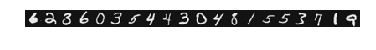

In [4]:
x = x.reshape(5000, 400)
sample = np.random.choice(x.shape[0], 20)
plt.imshow(x[sample, :].reshape(-1, 20).T, cmap='gray')
plt.axis('off');

In [6]:
def sigmoidFunction (z):
    return 1 / (1 + np.exp(-z))

In [717]:
def hypothesisFunction (theta, x):
    x = x.reshape(5000, 400)
    theta1 = theta[:10025].reshape(25, 401)
    theta2 = theta[10025:].reshape(10, 26)
    
    a1 = np.c_[np.ones((x.shape[0], 1)), x]
    z2 = np.dot(a1, theta1.T)
    
    a2 = np.c_[np.ones((x.shape[0], 1)), sigmoidFunction(z2)]
    z3 = np.dot(a2, theta2.T)
    
    a3 = sigmoidFunction(z3)
    return np.concatenate((a3.flatten(), z2.flatten(), a2.flatten(), a1.flatten()))

In [718]:
def costFunction (theta, x, y):
    y = y.reshape(5000, 10)
    h = hypothesisFunction(theta, x)[:50000].reshape(5000, 10)
    j = np.dot((1 / m), (np.log(h).T.dot(-y) - np.log(1 - h).T.dot(1 - y)))
    costs = []
    for number in range(10):
        costs.append(j[number, number])
    cost = np.array(costs)
    return cost

In [719]:
costFunction(initialTheta, x, y)

array([ 0.02115448,  0.03022682,  0.03946314,  0.02972325,  0.02998443,
        0.02026629,  0.028228  ,  0.03474724,  0.03946383,  0.0143717 ])

In [720]:
def regularizedCostFunction (theta, x, y, λ = 0.1):
    theta1 = theta[:10025].reshape(25, 401)
    theta2 = theta[10025:].reshape(10, 26)
    cost = costFunction(theta, x, y)
    cost += ((λ / (2 * m)) * (np.sum(np.square(theta1[:, 1:])) + np.sum(np.square(theta2[:, 1:]))))
    return cost

In [721]:
regularizedCostFunction(initialTheta, x, y, 0.1)

array([ 0.03076855,  0.03984089,  0.04907721,  0.03933732,  0.0395985 ,
        0.02988036,  0.03784207,  0.04436131,  0.0490779 ,  0.02398576])

In [722]:
def sigmoidGradient (z):
    return sigmoidFunction(z) * (1 - sigmoidFunction(z))

In [723]:
randomTheta = np.random.rand(10285) * 2 * 0.012 - 0.012

In [724]:
def backPropagationFunction (theta, x, y):
    y = y.reshape(5000, 10)
    theta2 = theta[10025:].reshape(10, 26)
    a3 = hypothesisFunction(theta, x)[:50000].reshape(5000, 10)
    z2 = hypothesisFunction(theta, x)[50000:175000].reshape(5000, 25)
    a2 = hypothesisFunction(theta, x)[175000:305000].reshape(5000, 26)
    a1 = hypothesisFunction(theta, x)[305000:].reshape(5000, 401)
    𝛿3 = a3 - y
    𝛿2 = np.dot(𝛿3, theta2)[:, 1:] * sigmoidGradient(z2)
    Δ2 = np.dot(a2.T, 𝛿3)
    Δ1 = np.dot(a1.T, 𝛿2)
    D2 = np.dot(1 / m, Δ2)
    D1 = np.dot(1 / m, Δ1)
    return np.concatenate((D1.flatten(), D2.flatten()))

In [725]:
def regularizedBackPropagationFunction (theta, x, y, λ = 0.1):
    theta1 = theta[:10025].reshape(25, 401)
    theta2 = theta[10025:].reshape(10, 26)
    
    D1 = backPropagationFunction(theta, x, y)[:10025].reshape(25, 401)
    reg1 = D1[:, 1:] + ((λ / m) * theta1[:, 1:])
    D1 = np.c_[D1[:, 1:2], reg1]
    
    D2 = backPropagationFunction(theta, x, y)[10025:].reshape(10, 26)
    reg2 = D2[:, 1:] + ((λ / m) * theta2[:, 1:])
    D2 = np.c_[D2[:, 1:2], reg2]

    return np.concatenate((D1.flatten(), D2.flatten()))

In [726]:
cost = regularizedCostFunction(randomTheta, x, y, 1)
backPropagation = regularizedBackPropagationFunction(randomTheta, x, y, λ = 1)
print(sum(cost))
print(sum(backPropagation))
randomTheta

6.96244924802
55.121319453


array([-0.00167359,  0.00622925, -0.00198922, ..., -0.01080899,
        0.00400247,  0.00820628])

In [727]:
randomTheta = randomTheta - backPropagation
print(sum(regularizedCostFunction(randomTheta, x, y, 0.1)))
print(sum(regularizedBackPropagationFunction(randomTheta, x, y, λ = 0.1)))
print(randomTheta)
initialTheta

3.42660732886
23.4933357188
[-0.00181887  0.00608273 -0.00295332 ..., -0.2117415  -0.19682862
 -0.19376611]


array([ -2.25623899e-02,  -1.05624163e-08,   2.19414684e-09, ...,
        -2.47795788e-01,   1.28009118e+00,  -1.32752042e+00])

In [728]:
randomTheta = randomTheta - backPropagation
print(sum(regularizedCostFunction(randomTheta, x, y, 0.1)))
print(sum(regularizedBackPropagationFunction(randomTheta, x, y, λ = 0.1)))
print(randomTheta)
initialTheta

5.6951218719
119.099496028
[-0.00196415  0.0059362  -0.00391742 ..., -0.41267401 -0.3976597  -0.3957385 ]


array([ -2.25623899e-02,  -1.05624163e-08,   2.19414684e-09, ...,
        -2.47795788e-01,   1.28009118e+00,  -1.32752042e+00])

In [729]:
randomTheta = randomTheta - backPropagation
print(sum(regularizedCostFunction(randomTheta, x, y, 0.1)))
print(sum(regularizedBackPropagationFunction(randomTheta, x, y, λ = 0.1)))
print(randomTheta)
initialTheta

8.47825544852
192.280522514
[-0.00210943  0.00578968 -0.00488151 ..., -0.61360653 -0.59849078
 -0.59771089]


array([ -2.25623899e-02,  -1.05624163e-08,   2.19414684e-09, ...,
        -2.47795788e-01,   1.28009118e+00,  -1.32752042e+00])

In [730]:
randomTheta = randomTheta - backPropagation
print(sum(regularizedCostFunction(randomTheta, x, y, 0.1)))
print(sum(regularizedBackPropagationFunction(randomTheta, x, y, λ = 0.1)))
print(randomTheta)
initialTheta

11.2891155204
261.55658771
[-0.00225471  0.00564315 -0.00584561 ..., -0.81453904 -0.79932186
 -0.79968328]


array([ -2.25623899e-02,  -1.05624163e-08,   2.19414684e-09, ...,
        -2.47795788e-01,   1.28009118e+00,  -1.32752042e+00])

In [731]:
randomTheta = randomTheta - backPropagation
print(sum(regularizedCostFunction(randomTheta, x, y, 0.1)))
print(sum(regularizedBackPropagationFunction(randomTheta, x, y, λ = 0.1)))
print(randomTheta)
initialTheta

14.0951436874
330.40185725
[-0.0024      0.00549662 -0.0068097  ..., -1.01547156 -1.00015295
 -1.00165567]


array([ -2.25623899e-02,  -1.05624163e-08,   2.19414684e-09, ...,
        -2.47795788e-01,   1.28009118e+00,  -1.32752042e+00])